In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

from google.colab import drive
drive.mount('/content/drive')

%cd "/content/drive/MyDrive/Colab Notebooks/Analisis de Datos"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/Analisis de Datos


In [22]:
# Cargar datos de Kaggle
data = pd.read_csv("train.csv")

# Mostrar primeras filas
data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [23]:
# Seleccionar las columnas necesarias
data = data[['GrLivArea', 'SalePrice']].dropna()

# Separar variables
X = data[['GrLivArea']].values
y = data['SalePrice'].values.reshape(-1, 1)

print("Ejemplo de datos:")
print(data.head())



Ejemplo de datos:
   GrLivArea  SalePrice
0       1710     208500
1       1262     181500
2       1786     223500
3       1717     140000
4       2198     250000


In [24]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)



In [25]:
model = LinearRegression()
model.fit(X_scaled, y_scaled)

# Predicciones
y_pred = model.predict(X_scaled)

# Métricas
rmse = np.sqrt(mean_squared_error(y_scaled, y_pred))
r2 = r2_score(y_scaled, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")
print("Intercepto (β0):", model.intercept_[0])
print("Pendiente (β1):", model.coef_[0][0])



RMSE: 0.7056
R²: 0.5021
Intercepto (β0): 2.26796444819906e-16
Pendiente (β1): 0.708624477612652


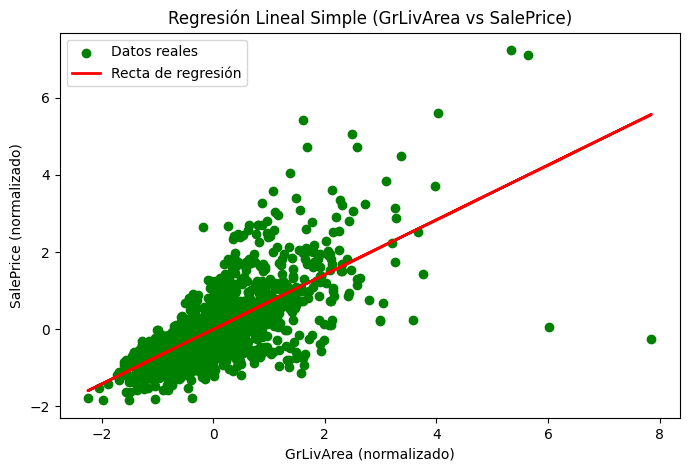

In [26]:
plt.figure(figsize=(8,5))
plt.scatter(X_scaled, y_scaled, color='green', label='Datos reales')
plt.plot(X_scaled, y_pred, color='red', linewidth=2, label='Recta de regresión')
plt.title('Regresión Lineal Simple (GrLivArea vs SalePrice)')
plt.xlabel('GrLivArea (normalizado)')
plt.ylabel('SalePrice (normalizado)')
plt.legend()
plt.show()



In [27]:
# Volver a escala original
beta1 = model.coef_[0][0] * (scaler_y.scale_[0] / scaler_X.scale_[0])
beta0 = scaler_y.mean_[0] - beta1 * scaler_X.mean_[0]

print(f"Ecuación del modelo:")
print(f"SalePrice = {beta0:.2f} + {beta1:.2f} * GrLivArea")


Ecuación del modelo:
SalePrice = 18569.03 + 107.13 * GrLivArea


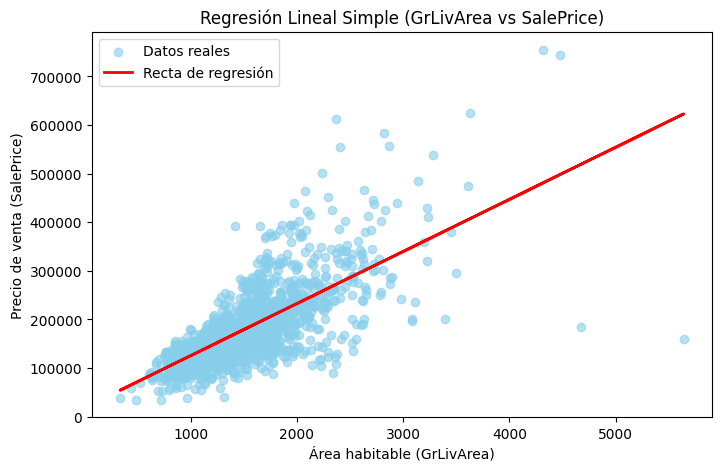

In [28]:
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='skyblue', alpha=0.6, label='Datos reales')
plt.plot(X, beta0 + beta1*X, color='red', linewidth=2, label='Recta de regresión')
plt.title('Regresión Lineal Simple (GrLivArea vs SalePrice)')
plt.xlabel('Área habitable (GrLivArea)')
plt.ylabel('Precio de venta (SalePrice)')
plt.legend()
plt.show()
